In [1]:
# Data Visualization
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Read File
bitstamp = pd.read_csv('bitstamp_filled.csv',parse_dates=['Timestamp'],index_col=['Timestamp'])
coinbase = pd.read_csv('coinbase_filled.csv',parse_dates=['Timestamp'],index_col=['Timestamp'])

In [3]:
#1. Plot of Overall Bitcoin Prices 
#1.1 Merging
Combined=pd.merge(bitstamp,coinbase,on='Timestamp',how='outer')

In [4]:
Combined=Combined[['Weighted_Price_x','Weighted_Price_y']]

<IPython.core.display.Javascript object>


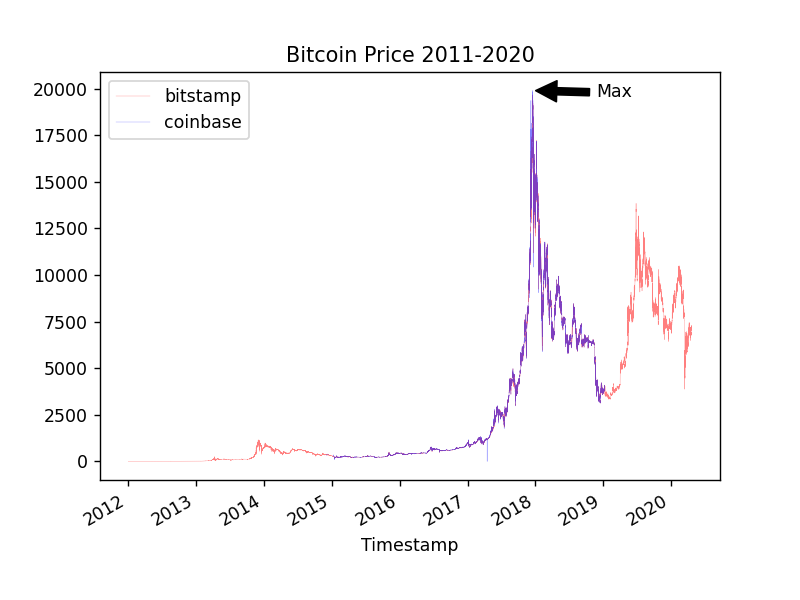

In [5]:
#1.1 Plotting
fig1, ax = plt.subplots(1,1)
Combined.plot(y=['Weighted_Price_x','Weighted_Price_y'],
              color=['red','blue'],label=['bitstamp','coinbase'],
              alpha=0.5,title='Bitcoin Price 2011-2020',lw=0.2,ax=ax)
ax.legend(loc='upper left')

In [7]:
Combined.idxmax()

Weighted_Price_x   2017-12-17 12:24:00
Weighted_Price_y   2017-12-17 12:38:00
dtype: datetime64[ns]

In [8]:
Combined.max()

Weighted_Price_x    19663.298888
Weighted_Price_y    19891.987528
dtype: float64

In [6]:
ax.annotate('Max',xy=(pd.Timestamp(2017,12,17),19892),
            xycoords='data',xytext=(0.8,0.95),
           textcoords='axes fraction',
            arrowprops=dict(facecolor='black',shrink=0.05),
            horizontalalignment='left',verticalalignment='center')

Text(0.8, 0.95, 'Max')

<IPython.core.display.Javascript object>


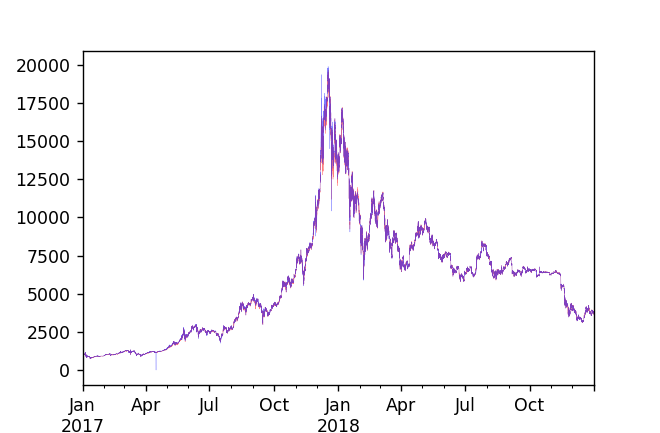

In [10]:
#2 Bit coin price 2017-2018
fig2 = plt.figure()
bitstamp['2017':'2018']['Weighted_Price'].plot(color='red',alpha=0.5,lw=0.2)
coinbase['2017':'2018']['Weighted_Price'].plot(color='blue',alpha=0.5,lw=0.2)

fig2.show()

In [3]:
#3 Comparison to non-ransomsoftware years
Compare = pd.DataFrame(columns=['Ransomed_c','Nonransomed_c'])
ransom =  coinbase['2017':'2019'].Close.resample('M').mean()
nonransom = coinbase['2014':'2016'].Close.resample('M').mean()
ransom = ransom.reset_index()
nonransom = nonransom.reset_index()

In [4]:
Compare['Ransomed_c'] = ransom['Close']
Compare['Nonransomed_c'] = nonransom['Close']

In [5]:
ransom =  bitstamp['2017':'2019'].Close.resample('M').mean()
nonransom = bitstamp ['2014':'2016'].Close.resample('M').mean()
ransom = ransom.reset_index()
nonransom = nonransom.reset_index()

In [6]:
Compare['Ransomed_b'] = ransom['Close']
Compare['Nonransomed_b'] = nonransom['Close']

In [7]:
Compare['Time']=nonransom['Timestamp'].dt.strftime('%y/%m')+'&'+ransom['Timestamp'].dt.strftime('%y/%m')

In [8]:
Compare.set_index('Time')

,Ransomed_c,Nonransomed_c,Ransomed_b,Nonransomed_b
Time,,,,
14/01&17/01,913.915843,377.227880,909.061639,819.042476
14/02&17/02,1063.054821,231.004946,1059.654111,664.340285
14/03&17/03,1136.301055,234.348901,1131.955339,594.659665
14/04&17/04,1209.503587,269.919040,1208.261422,462.574016
14/05&17/05,1904.387145,235.690884,1877.673866,485.544255
14/06&17/06,2618.218044,237.727019,2619.680779,613.092452
14/07&17/07,2496.623659,237.786113,2494.762874,618.637762
14/08&17/08,3836.781863,279.846569,3827.909320,537.321553
14/09&17/09,4110.761987,253.335763,4084.971986,445.189989


<IPython.core.display.Javascript object>


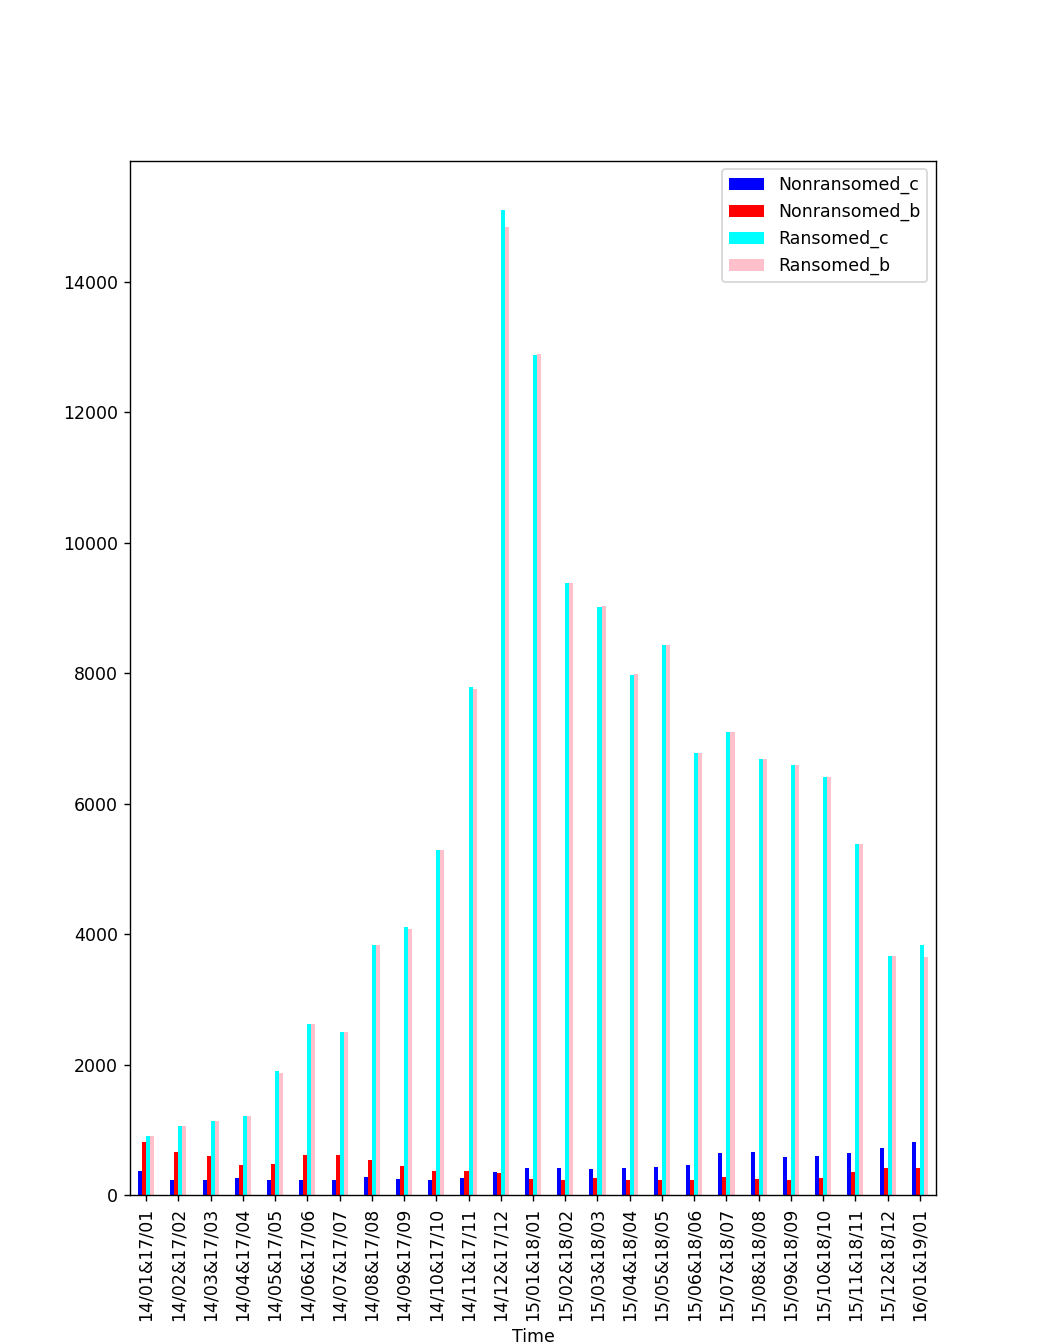

In [9]:
Compare.plot.bar(x='Time',y=['Nonransomed_c','Nonransomed_b','Ransomed_c','Ransomed_b',],
                 color=['b','r','cyan','pink'])

In [9]:
#4 Bar Chart Comparison
differences_C=[]
differences_B=[]
for year in range(2014,2019):
    differences_C.append(coinbase[str(year)]['High'].max()-coinbase[str(year)]['Low'].min())
    differences_B.append(bitstamp[str(year)]['High'].max()-bitstamp[str(year)]['Low'].min())
    

In [15]:
# Create a dataframe named Barchart to present diffrences
BarChart= pd.DataFrame({'bitstamp':differences_B,'coinbase':differences_C,},
                       index=['2014','2015','2016','2017','2018'])

In [16]:
BarChart

,bitstamp,coinbase
2014,720.00,98.00
2015,349.60,390.12
2016,979.24,637.96
2017,18914.66,19891.93
2018,14112.71,14049.11


<IPython.core.display.Javascript object>


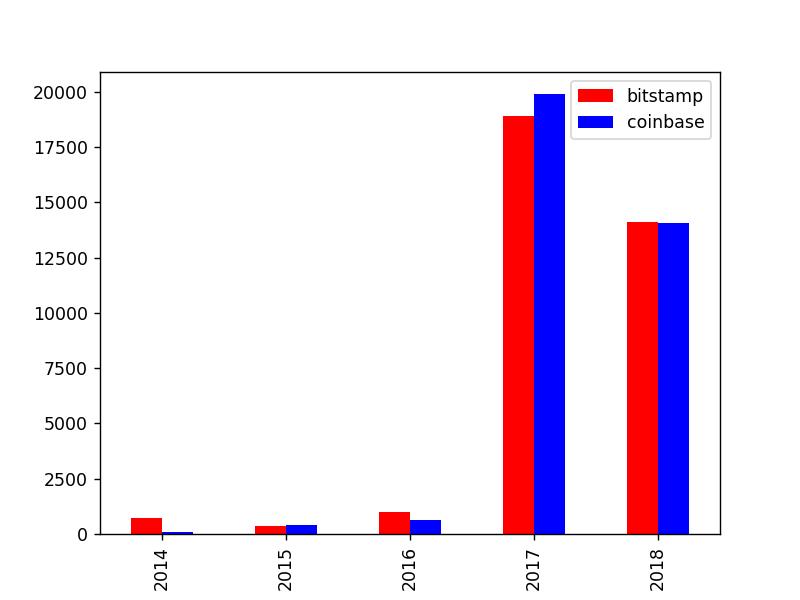

In [24]:
BarChart.plot.bar(color=['red','blue'])